## Machine Learning Model Building



### Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

### Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

### Acknowledgements
This public dataset is part of Airbnb, and the original source can be found on this website.

### What is the objective of the machine learning model?

We aim to minimise the difference between the real price, and the estimated price by our model. We will evaluate model performance using the R_squared.

### How do I download the dataset?

To download the New York City Airbnb Open Dataset go htis website:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data


====================================================================================================

## Imports
importing Libraries

In [12]:
import numpy as np # import numpy
import tensorflow as tf # import tensorflow
import matplotlib.pyplot as plt # import matplotlib
import pandas as pd # import pandas
import seaborn as sns # import seaborn

warnings.filterwarnings('ignore')


### Checking tensorflow version and GPU availability

In [18]:
print(tf.version.VERSION)
print('GPU is', 'available' if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVAILABLE')

2.1.0
GPU is available


## Load data and take a look at it

In [14]:
data = pd.read_csv('airbnb new york.csv').sample(frac=1)
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Data Exploration on NYC Airbnb

In [20]:
#checking amount of rows in given dataset to understand the size we are working with
len(data)

48895

In [21]:
#checking type of every column in the dataset
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [24]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [22]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3),  ' % missing values')

name 0.0  % missing values
host_name 0.0  % missing values
last_review 0.206  % missing values
reviews_per_month 0.206  % missing values


In [25]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [27]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
data.neighbourhood.unique()

array(['Bedford-Stuyvesant', 'Theater District', 'Harlem',
       'Crown Heights', 'Washington Heights', 'Kew Gardens',
       'South Slope', 'Williamsburg', 'Whitestone', 'Kips Bay',
       'Greenpoint', 'East Village', 'Park Slope', 'Bushwick',
       'Morningside Heights', 'East Harlem', 'Upper West Side',
       'Ditmars Steinway', 'Flatbush', 'East Flatbush', 'Upper East Side',
       'Cambria Heights', 'Murray Hill', 'Midtown', 'Kensington',
       'Kingsbridge', 'Financial District', 'Mount Hope',
       'Carroll Gardens', 'West Village', 'Allerton', 'Glendale',
       'Cypress Hills', "Hell's Kitchen", 'Chelsea', 'Bayswater',
       'Chinatown', 'Prospect-Lefferts Gardens', 'Prospect Heights',
       'Nolita', 'Gramercy', 'Long Island City', 'Boerum Hill', 'Inwood',
       'Astoria', 'Sunset Park', 'Windsor Terrace', 'Fresh Meadows',
       'SoHo', 'Dyker Heights', 'Cobble Hill', 'South Beach',
       'East Elmhurst', 'Fieldston', 'Manhattan Beach',
       'Springfield Gardens'

In [29]:
#examining the unique values of room_type as this column will appear very handy for later analysis
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [31]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=data.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [33]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=data.calculated_host_listings_count.max()
top_host_check

327

In [35]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '16098958'),
 Text(0, 0, '12243051'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

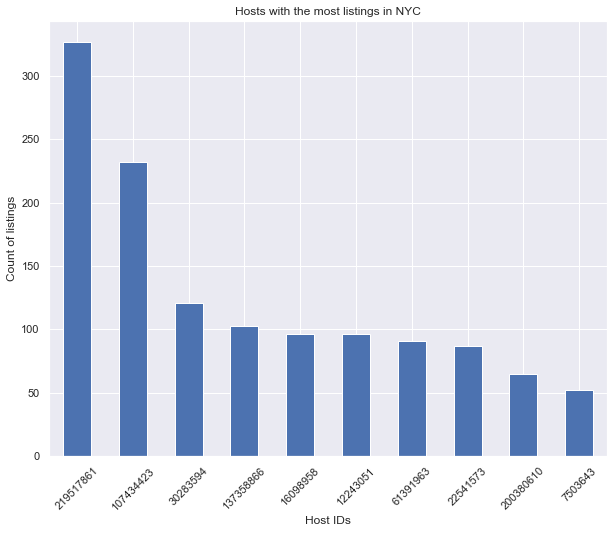

In [36]:
viz_1=top_host.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


From the above table we can see than the mean price of rooms is 157 $.

In [38]:
data.corr().style.background_gradient(cmap='coolwarm')
#No strong correlation except number_of_reviews vs reviews_per_month

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


### Relation between missing values and the Price

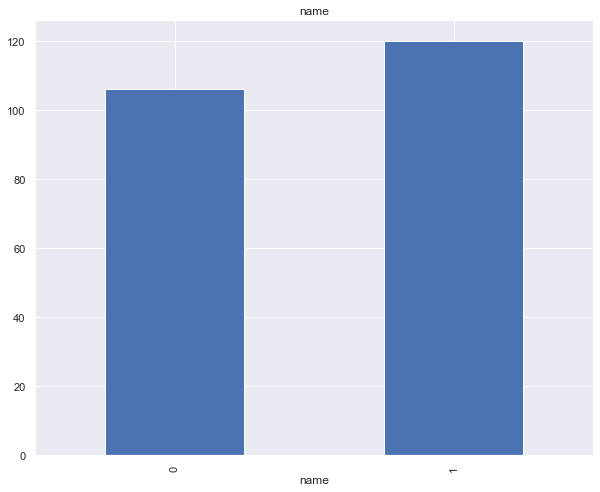

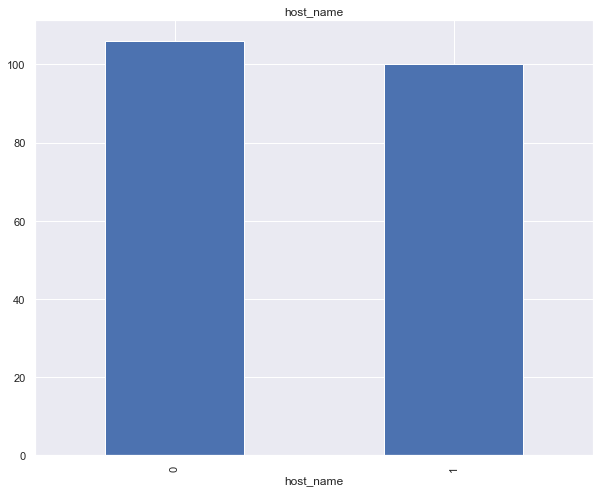

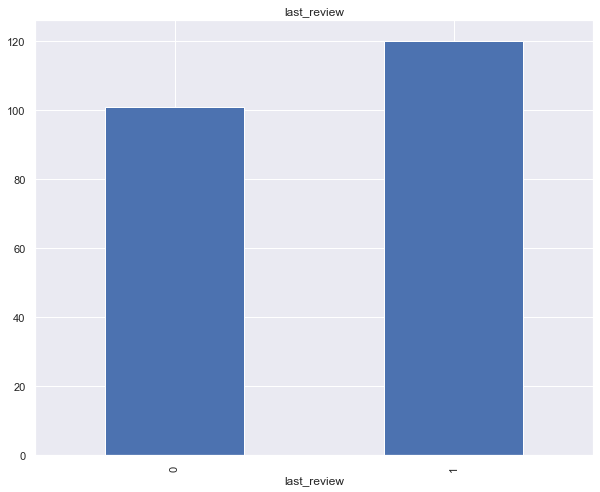

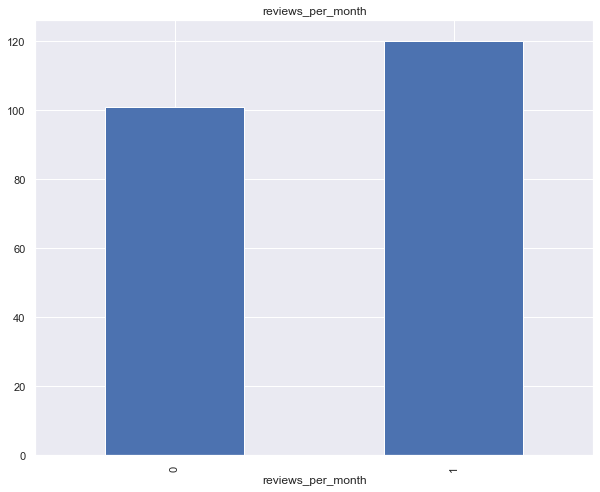

In [39]:
def analyse_na_value(df,var):
    df=df.copy()
    
    #Let's make a variable that indicates 1 if the observation was missing or Zero otherwise 
    df[var]=np.where(df[var].isnull(),1,0)
    
    #Let's calculate the mean SalePrice where the information is missing or present 
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(data,var)

## Data preprocessing

In [15]:
features = data[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 
                 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
#print(features.isna().sum())
features['reviews_per_month'] = features['reviews_per_month'].fillna(0)
#print(features.isna().sum())

onehot_neighborhood_group = pd.get_dummies(features['neighbourhood_group'])
onehot_room_type = pd.get_dummies(features['room_type'])
#print(onehot_room_type)

features = features.drop(columns=['neighbourhood_group', 'room_type'])
features = pd.concat([features, onehot_neighborhood_group, onehot_room_type], axis=1)
#print(features.head())

targets = data['price']

train_size = int(0.7*len(data))
X_train, X_test = features.values[:train_size, :], features.values[train_size:, :]
y_train, y_test = targets.values[:train_size], targets.values[train_size:]

print(len(X_train[0]))

13


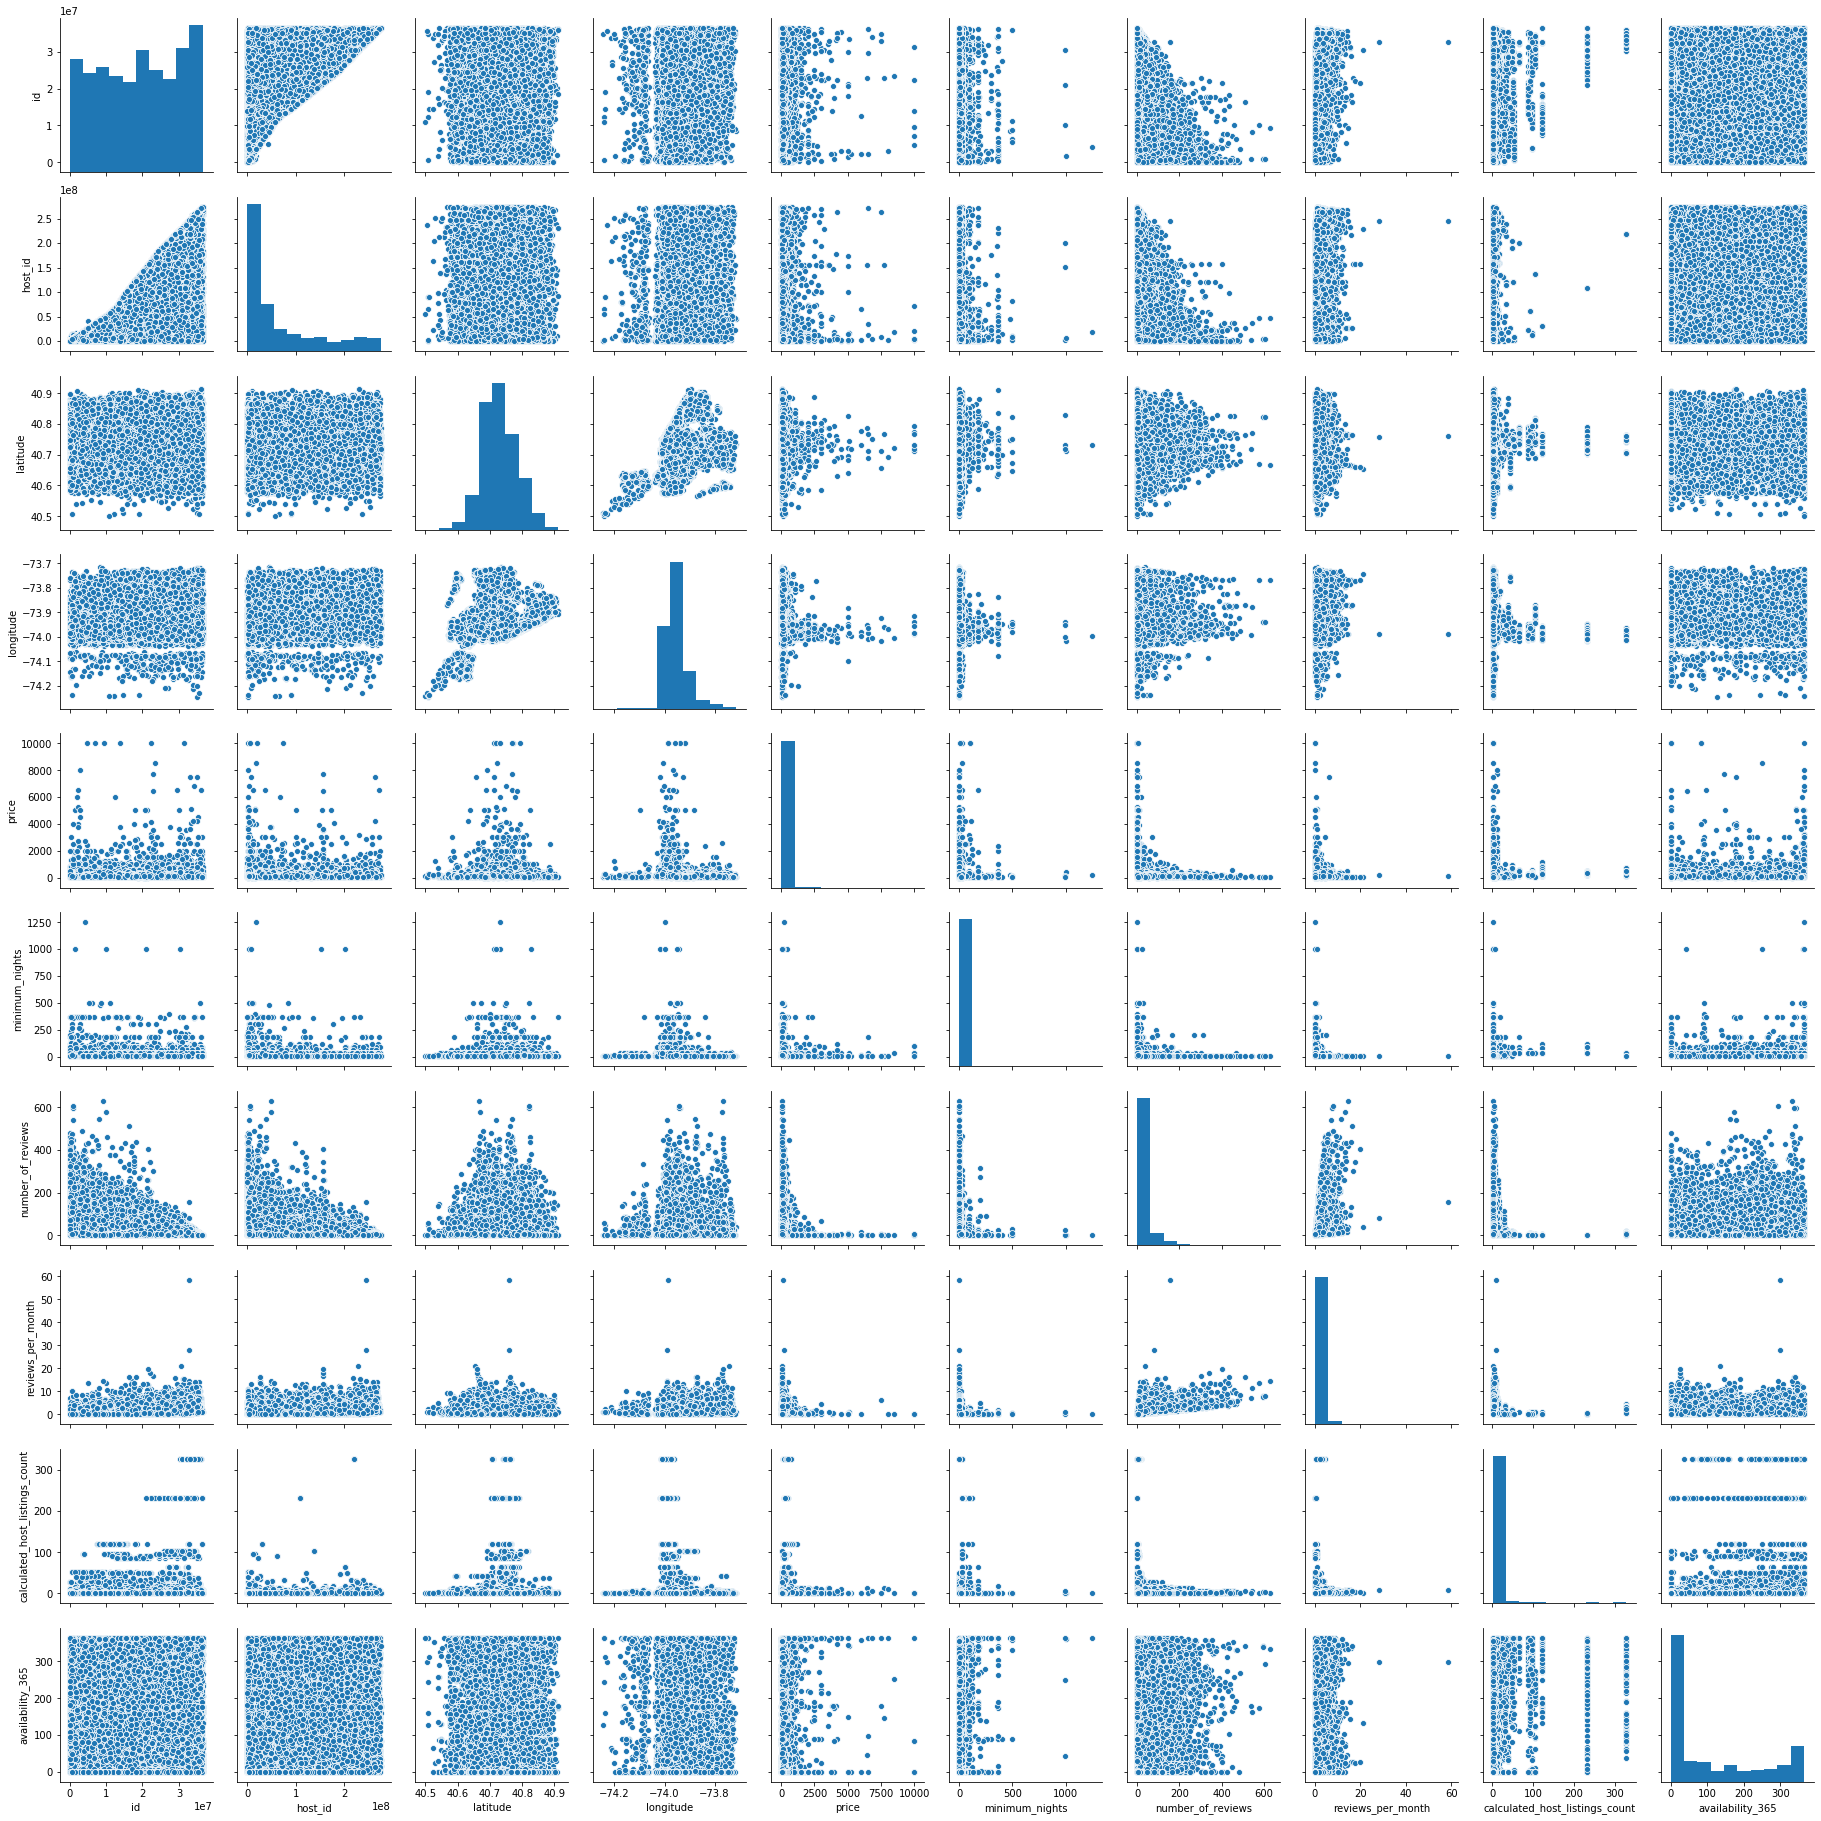

In [16]:
sns.pairplot(data)

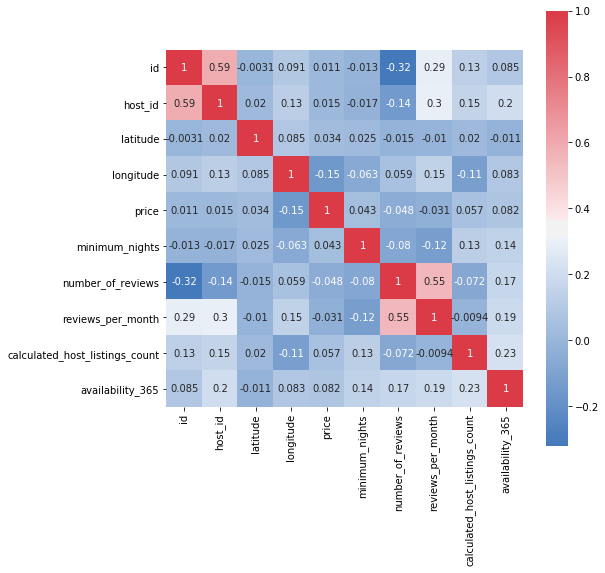

In [17]:
corr = data.corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.figure(figsize=(8, 8))
sns.heatmap(corr, square=True, cmap=cmap, annot=True)

## The Tensorflow 2 Machine Learning Approaches

## Multi Layer Perceptron (Artificial Neural Network)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [7]:
def R_squared(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(y_true - y_pred))
    total = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1.0 - residual / total
    return r2

adam_optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.MAE
model.compile(
    optimizer=adam_optimizer,
    loss=loss_fn,
    metrics=[
        tf.keras.metrics.MAE,
        tf.keras.metrics.MSE,
        R_squared, # -1 and 1, < 0 => useless, 0 and 1 => better close to 1
    ]
)

In [8]:
print(len(X_train[0]))
model.fit(X_train, y_train, epochs=10)
model.save('my ann.h5') 

13
Train on 34226 samples
Epoch 1/10
34226/34226 [==============================] - 3s 76us/sample - loss: 98.5254 - mean_absolute_error: 98.5254 - mean_squared_error: 63383.5898 - R_squared: -0.4872
Epoch 2/10
34226/34226 [==============================] - 2s 58us/sample - loss: 70.1414 - mean_absolute_error: 70.1413 - mean_squared_error: 55100.4141 - R_squared: 0.1426
Epoch 3/10
34226/34226 [==============================] - 2s 61us/sample - loss: 66.3296 - mean_absolute_error: 66.3296 - mean_squared_error: 53985.9844 - R_squared: 0.2229
Epoch 4/10
34226/34226 [==============================] - 2s 60us/sample - loss: 65.3149 - mean_absolute_error: 65.3149 - mean_squared_error: 53668.5664 - R_squared: 0.2411
Epoch 5/10
34226/34226 [==============================] - 2s 60us/sample - loss: 64.9021 - mean_absolute_error: 64.9020 - mean_squared_error: 53501.1328 - R_squared: 0.2437
Epoch 6/10
34226/34226 [==============================] - 2s 60us/sample - loss: 64.7695 - mean_absolute_err

In [9]:
loaded_model = tf.keras.models.load_model('my ann.h5', custom_objects={"R_squared": R_squared})
print(loaded_model.summary())
loaded_model.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1792      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  129       
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________
None
14669/14669 [==============================] - 1s 51us/sample - loss: 62.4481 - mean_absolute_error: 62.4481 - mean_squared_error: 54718.8750 - R_squared: 0.2858


[62.448130636795774, 62.44812, 54718.875, 0.2858145]

In [10]:
print(loaded_model(X_test[:2]))
print(y_test[:2])

tf.Tensor(
[[130.12201]
 [130.60022]], shape=(2, 1), dtype=float32)
[195 289]
